In [5]:
import string
import nltk
nltk.download("stopwords")
nltk.download('wordnet')
nltk.download('punkt')

import pandas as pd
df = pd.read_csv('bbc-news-data-modified.csv')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stop_words = set(stopwords.words('english')) 
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
    
def process_text(text):
    # Remove punctuation and split the text
    translator = str.maketrans('', '', string.punctuation)
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Clean the text to not contain stop words and non alpha words
    cleaned_words = [word.lower().translate(translator) for word in words if word.lower().isalpha() and word.lower() not in stop_words]
    
    # Return the words in the text that have been stemmed and lemmatized
    processed_words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in cleaned_words]
    return " ".join(processed_words)

clean_data_column = "processed_data"
df[clean_data_column] = df['content'] + ' ' + df['title']
df[clean_data_column] = df[clean_data_column].apply(process_text)


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# Create a TfidfVectorizer with your choice of parameters
#tfidf_vectorizer = TfidfVectorizer(max_features=1000)

tfidf_vectorizer = TfidfVectorizer()

# Fit and transform your cleaned and preprocessed content
tfidf_matrix = tfidf_vectorizer.fit_transform(df[clean_data_column])

# Get the feature names (words) corresponding to the columns
feature_names = tfidf_vectorizer.get_feature_names_out()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print(X_pca)

[nltk_data] Downloading package stopwords to /home/fil/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/fil/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/fil/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[[-0.041686    0.12208257]
 [ 0.0400118   0.11891991]
 [ 0.01615966  0.07122225]
 ...
 [ 0.03763542  0.08596187]
 [ 0.01619185  0.05560425]
 [-0.09181908 -0.04618444]]


/tmp/ipykernel_923/552959401.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="red", cmap='viridis', marker='o', edgecolor='k', s=50)


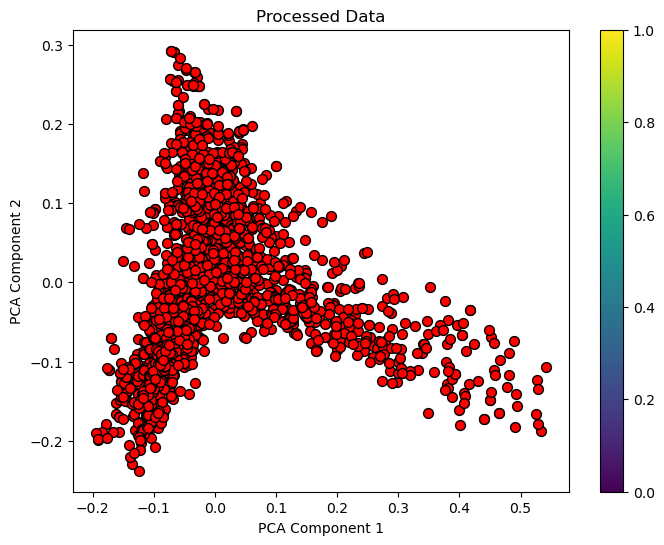

In [8]:
import matplotlib.pyplot as plt

# Function to plot clusters
def plot_clusters(labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()
    
plot_clusters("light blue", "Preprocessed Data")

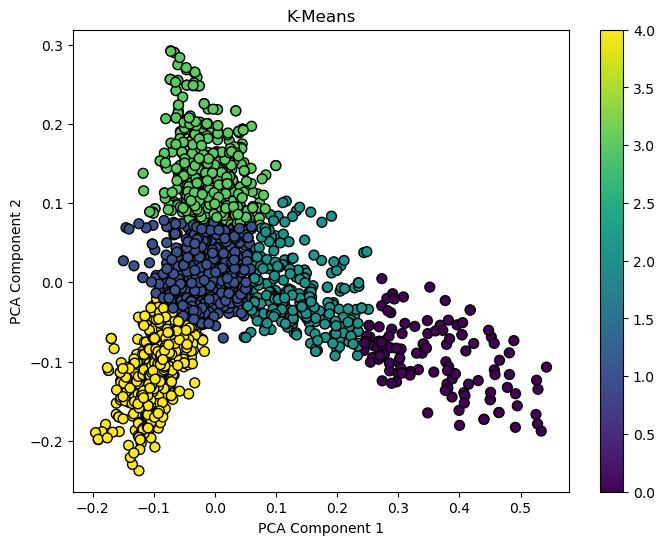

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_pca)

plot_clusters(kmeans.labels_, "K-Means")

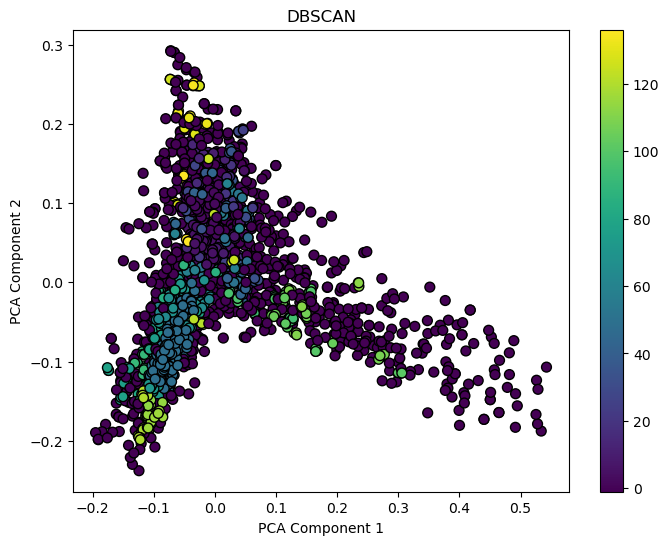

In [ ]:
def plot_graphs(function,name):
    plot_clusters(function.labels_, name)

from sklearn.cluster import DBSCAN
db_scan = DBSCAN(eps=0.0045, min_samples=3).fit(X_pca)

plot_clusters(db_scan.labels_, "DBSCAN")

algo = function(eps=0.0045, min_samples=3).fit(X_pca)    
clustering = AgglomerativeClustering().fit(X)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X_pca)